## Project name: House prices - Clustering by KMeans

### All the Life cycle ina data science projects
1. Data analysis
2. Feature Engineering
3. Feature Scaling
4. Feature Selection
5. K-Means Clustering

In [1]:
#Data Analysis Phase

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##Display all columns in Dataframe
pd.pandas.set_option('display.max_columns',None)

In [3]:
##Read the train file

dataset=pd.read_csv('train.csv')

In [4]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

# In Data Analysis we will analyze the following:

1. Missing Values
2. All the Numerical Variables
3. Distribution of the Numerical Variables 
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between Independent and Dependent feature

In [5]:
dataset.shape

(1460, 81)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Missing values

In [8]:
##Checking the percentage of nan values in features
## 1- Make the list of features with missing values
feature_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0]

## 2-print features name along with the percentage of missing values
for feature in feature_with_na:
    print(feature,np.round(dataset[feature].isnull().mean(),4),"    % missing values" )

LotFrontage 0.1774     % missing values
Alley 0.9377     % missing values
MasVnrType 0.0055     % missing values
MasVnrArea 0.0055     % missing values
BsmtQual 0.0253     % missing values
BsmtCond 0.0253     % missing values
BsmtExposure 0.026     % missing values
BsmtFinType1 0.0253     % missing values
BsmtFinType2 0.026     % missing values
Electrical 0.0007     % missing values
FireplaceQu 0.4726     % missing values
GarageType 0.0555     % missing values
GarageYrBlt 0.0555     % missing values
GarageFinish 0.0555     % missing values
GarageQual 0.0555     % missing values
GarageCond 0.0555     % missing values
PoolQC 0.9952     % missing values
Fence 0.8075     % missing values
MiscFeature 0.963     % missing values


# Since there are many missing values, we need to find relationdhip between missing values and Sales price

Let's Plot some diagram for relationship

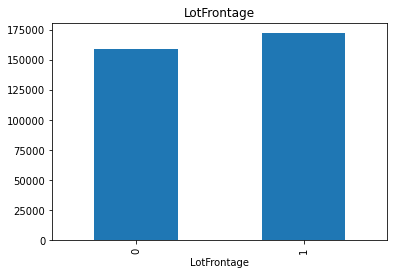

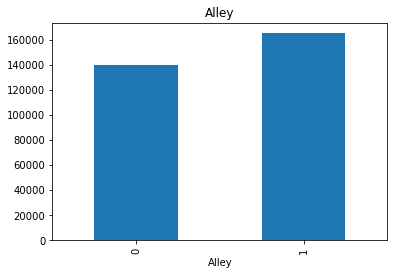

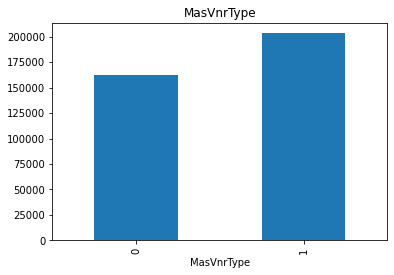

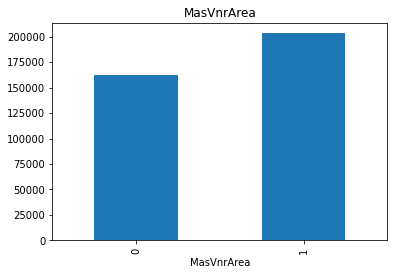

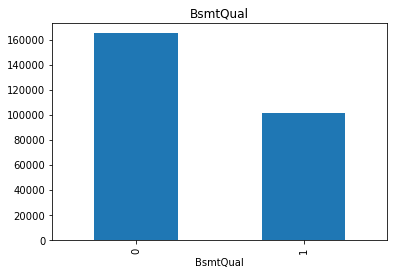

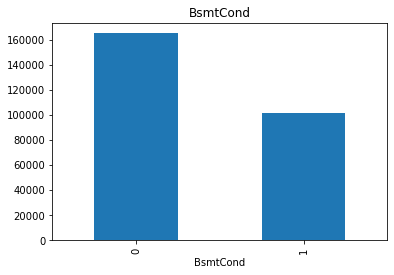

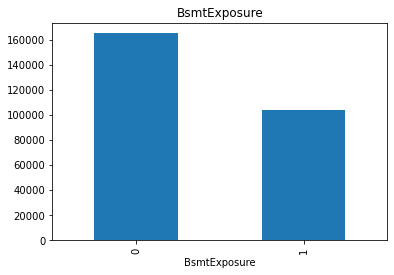

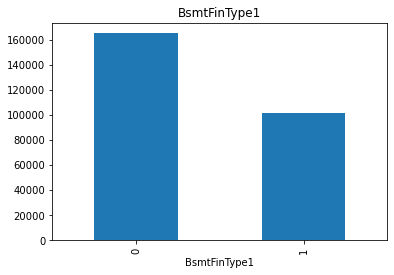

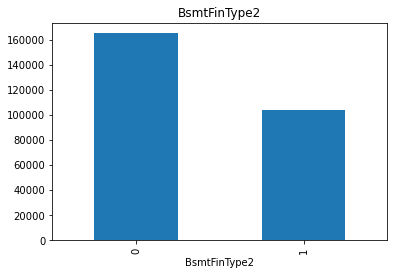

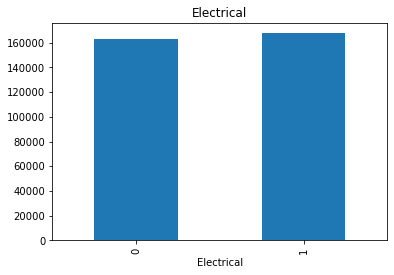

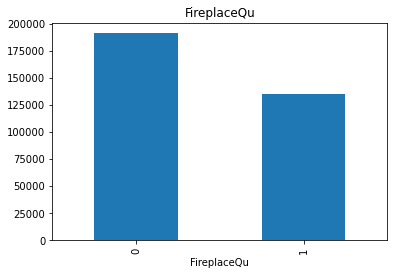

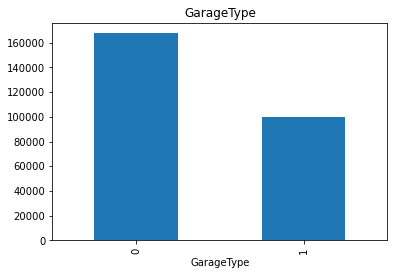

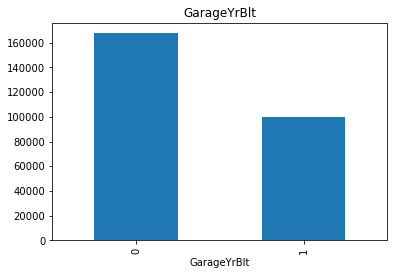

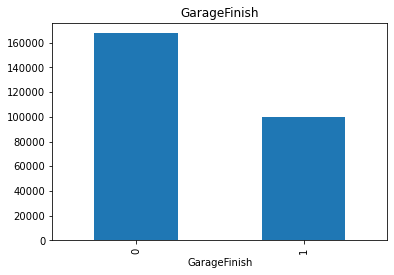

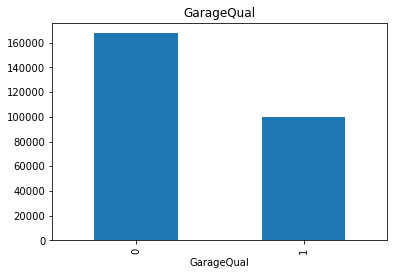

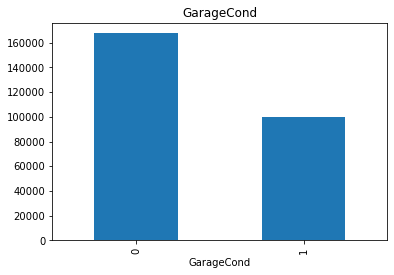

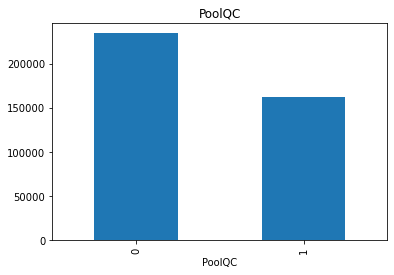

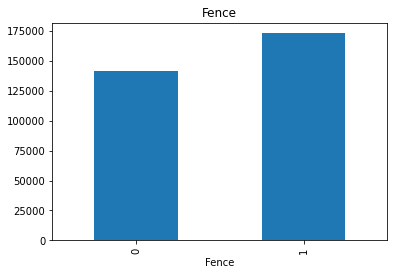

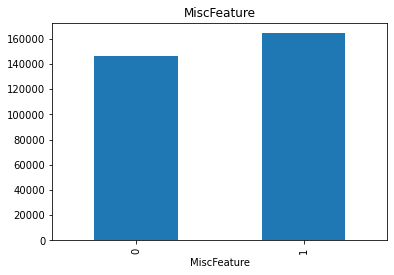

In [9]:
for feature in feature_with_na:
    data=dataset.copy()
    
    #let's make a variable that indicates 1 if the observation was missing or zero other wise
    data[feature]=np.where(data[feature].isnull(),1,0)
    
    #let's calculate the mean of Sales price where information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    
    plt.title(feature)
    plt.show()
    

#### (Obervation needs to written after every analysis part)

Here with the mising values and the dependent variable is cleary visible. So we need to replace the nan values with some meaningfull which we will do in the feature engineering section

From the above dataset some of the features like ID is not required.

First let's check the count of ID

In [10]:
print("Id of the Houses {}".format(len(dataset['Id'])))

Id of the Houses 1460


### Numerical Variables


Let's find out how many features are numerical variables because we need to perform analysis on it

In [11]:
# List of numerical variables (using list comprehension)

numerical_features=[i for i in dataset.columns if dataset[i].dtypes !='O']

print(len(numerical_features))

#visualize the numerical data

dataset[numerical_features].head()

38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Some feature in the above numerical dataset are having datetime feature

### Temporal variables (eg: Date time variables)

Date time variables are also called temporal variables because each and every year new data will be coming so current dataand will be dependent on the previous data.

  From the dataset we have 4 variables.We have to exract information from datetime variable like no. of years or no. of days. One example in this specific scenario can be difference in year the house was built and the years the house was sold.
    
  We will be permforming this analysis in the feature engineering.

In [12]:
#List of variables containing such information (Using logic in list comprhsn)

year_feature=[i for i in numerical_features if 'Yr' in i or 'Year' in i]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [13]:
# Let's explore the content in year features

for p in year_feature:
    print(p, ':' , dataset[p].unique())

YearBuilt : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd : [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt : [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962.

##### Let' get more info on data analysis stage

Text(0.5, 1.0, 'House Price Vs Year Sold')

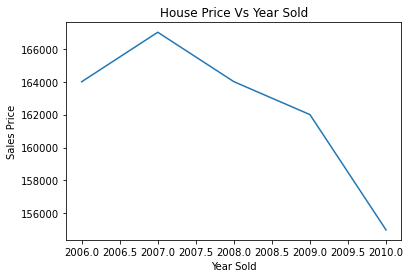

In [14]:
# Let's analyze the temporal variables (since there are so many yr feature we will check with yr sold)
# We will check whether there is relation between year the house is sold and output variable i.e is Sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel('Sales Price')
plt.title('House Price Vs Year Sold')

From the above graph we see that the Price is decreasing which cannot be true. In such case so we are going to gather more information out of it

In [15]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

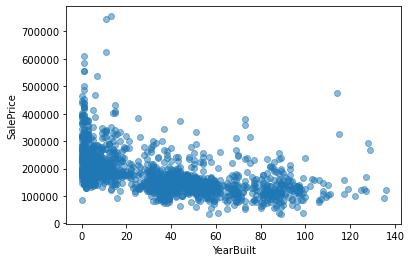

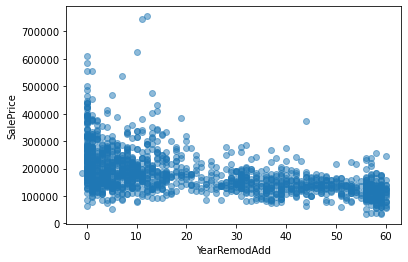

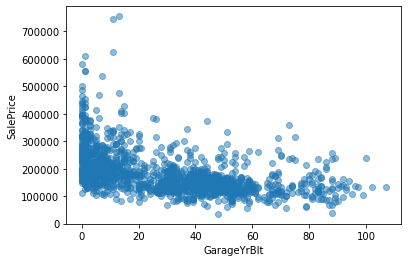

In [16]:
## Here we will capture the DIFFERENCE between all the Yr feature with the sales price (rather than focusing on YrSold)
## Deep copy is used so that we do not make any changes in the original dataset while performaing EDA

for i in year_feature:
    data=dataset.copy()
    if i !='YrSold':
        # We will capture the between the all yr variables and the Year the house is being Sold
        data[i]=data['YrSold']-data[i]
    
        plt.scatter(data[i],data.SalePrice,alpha=0.5)
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show() ## always use to show all graphs

From the above graphs it is cleary visible that House Price is decreasing along with Year passed. Eg. In Yr Built graph the House Price is Low w.r.t to 140 yrs old house and Price is High for newly built Houses. Same conclusion goes for Yr of Remodification and Garage Yr Built.

#### Numerical variables are of two types:
1. Countious variables
2. Discreate variables

In [17]:
#Let, get the count for discreate variables in the dataset

discreate_features=[i for i in numerical_features if len(dataset[i].unique())<25 and i not in year_feature+['Id']]
print('Discreate variable count: {}'.format(len(discreate_features)))

Discreate variable count: 17


In [18]:
dataset[discreate_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


#### Note:

EDA is used to gather more information from the data or finding the relationship and comparison between the features and the dependent variable

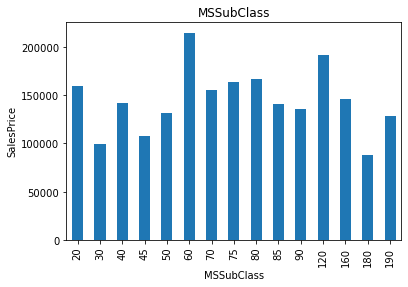

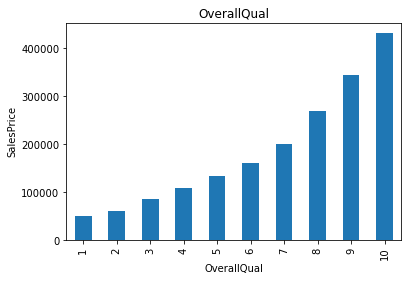

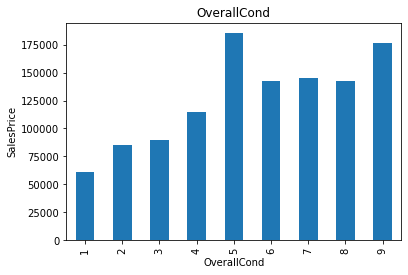

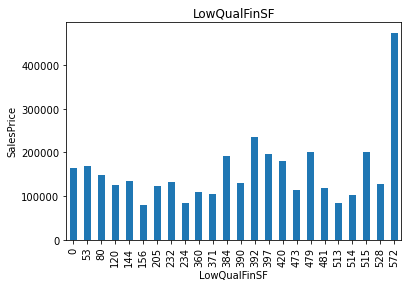

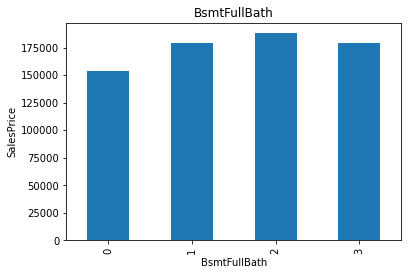

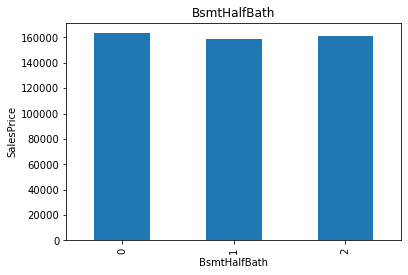

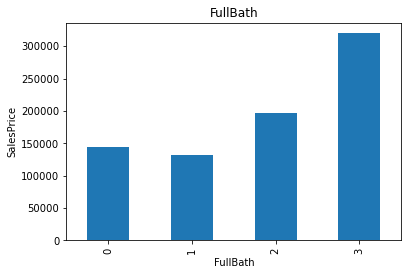

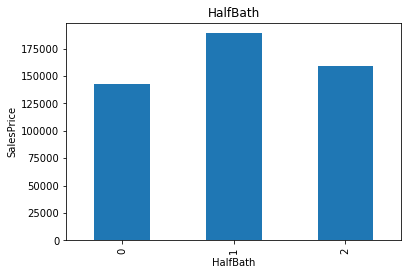

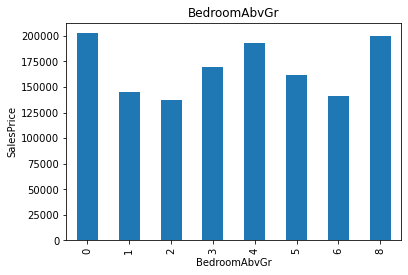

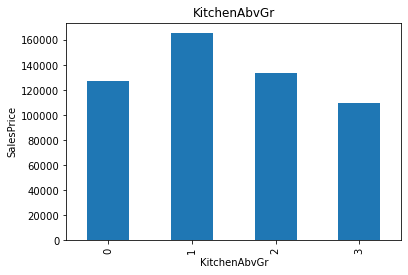

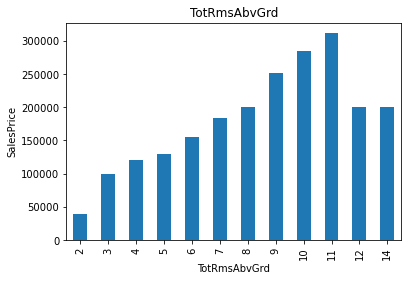

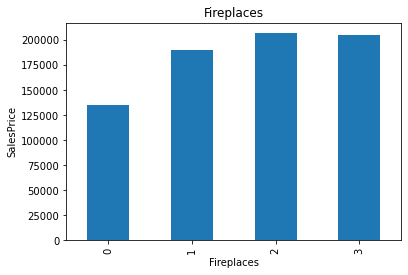

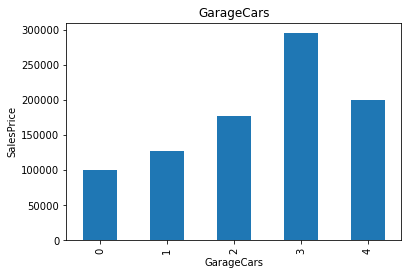

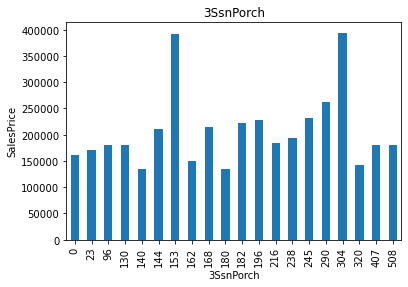

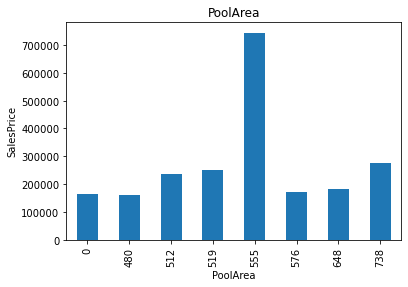

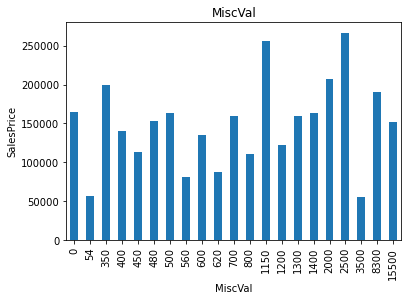

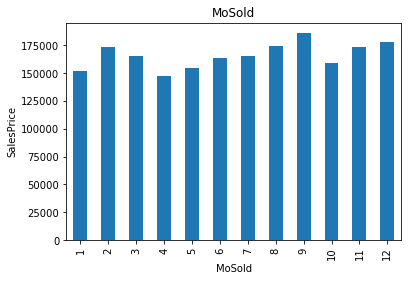

In [19]:
## Let's find the relationship between discreate variables and Sales Price

for i in discreate_features:
    data=dataset.copy()
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalesPrice')
    plt.title(i)
    plt.show()

From the above graphs we see that 'OveralQual' like features are having exponential rise also called Monotonic Relationship

Some graphs are also having zig-zag manner. o we can conclude that there i a relationship between Dicreate variables and the dependent Label ('Sales Price')

### Continuos Variables

In [20]:
continuos_features=[i for i in numerical_features if i not in discreate_features+year_feature+['Id']]
print('Continous Variables Count: {}'.format(len(continuos_features)))

Continous Variables Count: 16


In [21]:
dataset[continuos_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


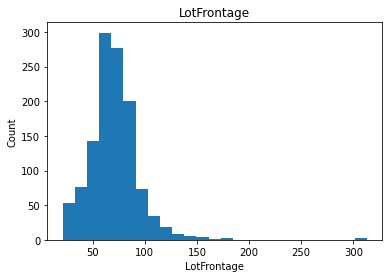

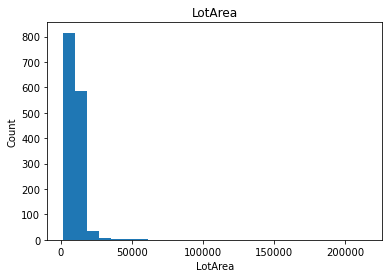

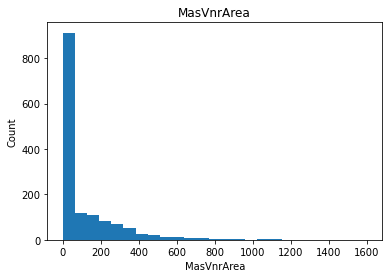

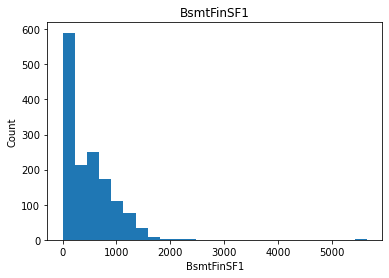

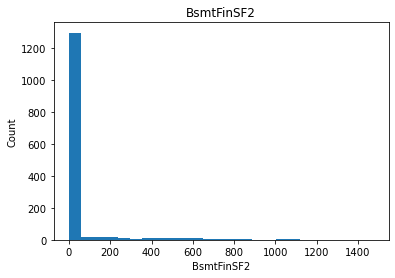

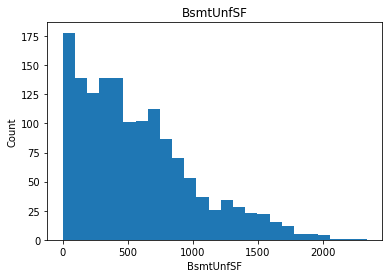

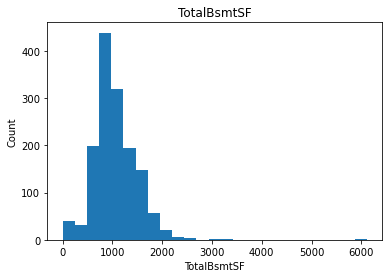

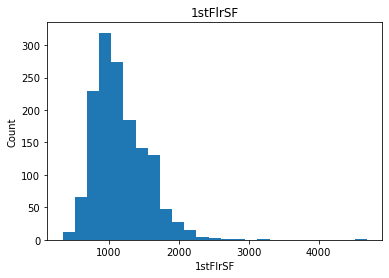

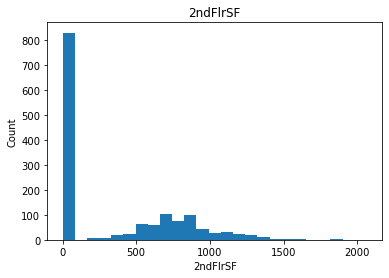

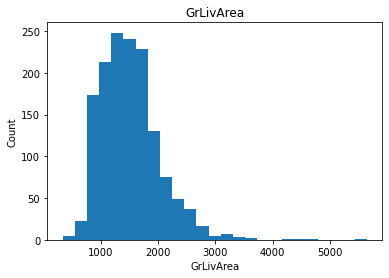

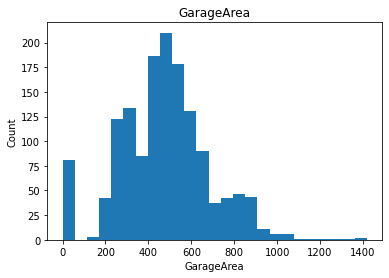

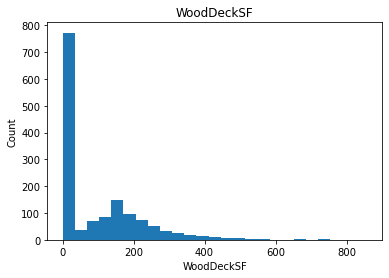

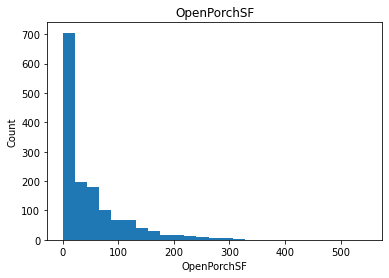

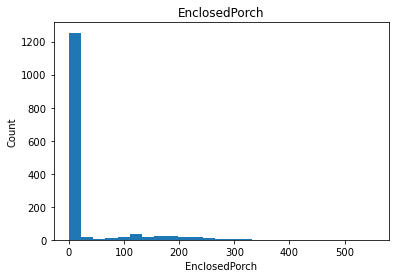

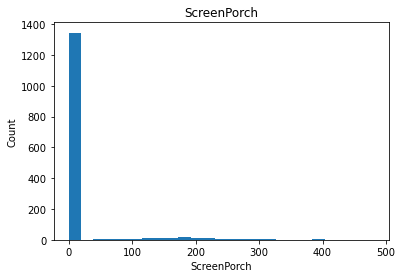

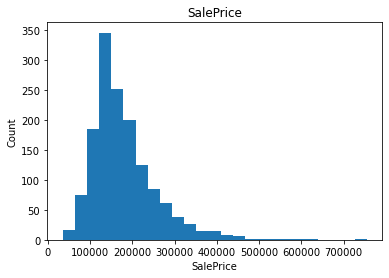

In [22]:
# let's analyze the contiuos values by creating histogram to understand the distribution

for i in continuos_features:
    data=dataset.copy()
    data[i].plot.hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

In case of Continuos Var. we need to check the distribution always.

From the graphs above we understand that there some features are having Gausian Distribution and many of them dont have such which is also called Skewed Data.So, we need perform Log normalization to convert from Non-Gausian To Gausian or Stndrd normal distribution. This wil help to perform Linear Model prediction in Regresion Problem statement.

In [23]:
%whos

Variable             Type         Data/Info
-------------------------------------------
continuos_features   list         n=16
data                 DataFrame            Id  MSSubClass MS<...>n[1460 rows x 81 columns]
dataset              DataFrame            Id  MSSubClass MS<...>n[1460 rows x 81 columns]
discreate_features   list         n=17
feature              str          MiscFeature
feature_with_na      list         n=19
i                    str          SalePrice
np                   module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
numerical_features   list         n=38
p                    str          YrSold
pd                   module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                  module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns                  module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>
year_feature         list         n=4


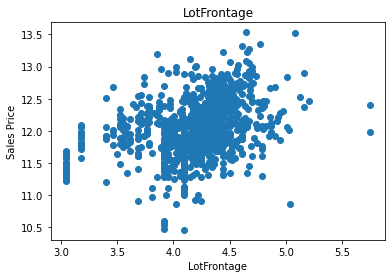

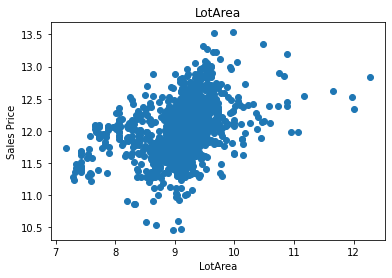

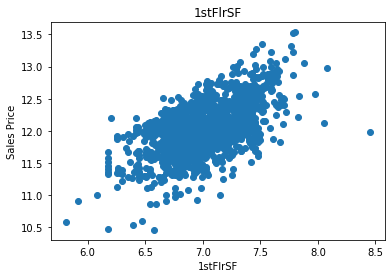

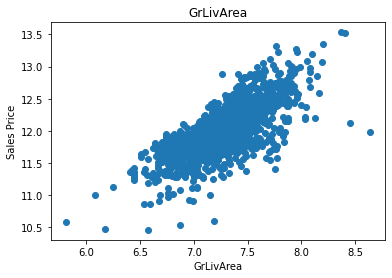

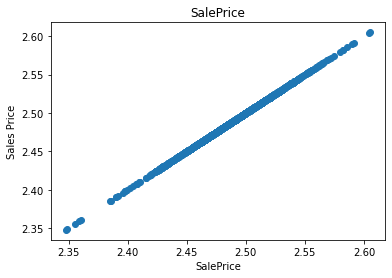

In [24]:
##Log Transformation on Continous Variable

for i in continuos_features:
    data=dataset.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        ##We are also log transforming SalePrice (which will look different) just to plot with x axis
        data['SalePrice']=np.log(data['SalePrice'])
        ##Visualizing
        plt.scatter(data[i],data['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('Sales Price')
        plt.title(i)
        plt.show()

After applying log normalization we see there monotonic relationship and positive correlation

#### Checking Outliers

Basically Values in distribution which are completely out of Range having extremely high or low values (Does not work for categorical feature, works in continuos variable)

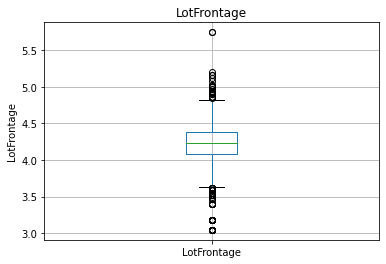

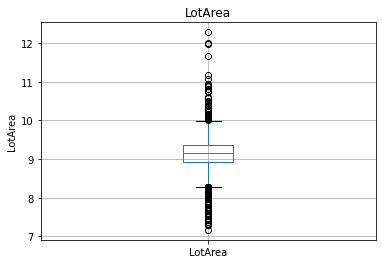

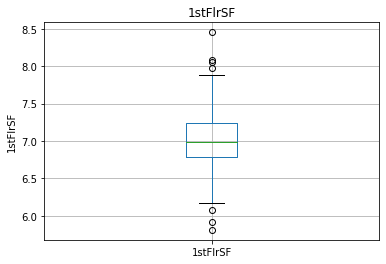

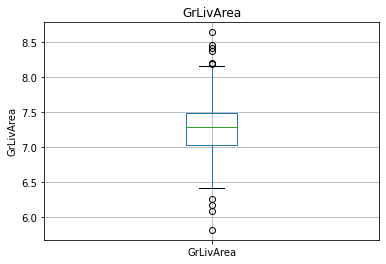

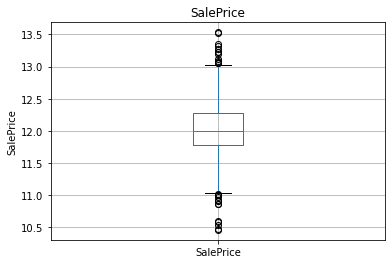

In [25]:
for i in continuos_features:
    data=dataset.copy()
    if 0 in data[i].unique(): ##check the condition
        pass
    else:
        data[i]=np.log(data[i])
        ##Visualizing in box plot
        data.boxplot(column=i)
        plt.ylabel(i)
        plt.title(i)
        plt.show()

### Categorical features

In [26]:
categoriacal_feature=[i for i in dataset.columns if data[i].dtypes=='O']
print('Categorical Feature Count: {}'.format(len(categoriacal_feature)))

Categorical Feature Count: 43


In [27]:
dataset[categoriacal_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### To check Cardinality values

Means how many categories are there in Categorical feature which gives more info how to handle such values

In [28]:
for i in categoriacal_feature:
    print('Feature is {} with no. of categories are {}'.format(i,len(dataset[i].unique())))

Feature is MSZoning with no. of categories are 5
Feature is Street with no. of categories are 2
Feature is Alley with no. of categories are 3
Feature is LotShape with no. of categories are 4
Feature is LandContour with no. of categories are 4
Feature is Utilities with no. of categories are 2
Feature is LotConfig with no. of categories are 5
Feature is LandSlope with no. of categories are 3
Feature is Neighborhood with no. of categories are 25
Feature is Condition1 with no. of categories are 9
Feature is Condition2 with no. of categories are 8
Feature is BldgType with no. of categories are 5
Feature is HouseStyle with no. of categories are 8
Feature is RoofStyle with no. of categories are 6
Feature is RoofMatl with no. of categories are 8
Feature is Exterior1st with no. of categories are 15
Feature is Exterior2nd with no. of categories are 16
Feature is MasVnrType with no. of categories are 5
Feature is ExterQual with no. of categories are 4
Feature is ExterCond with no. of categories a

From above output we can understand that some feature are having more than 7 unique categories which needs be handled and others can be one-hot encoded

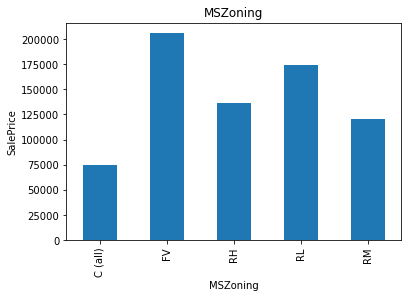

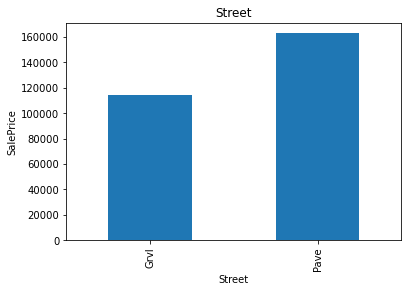

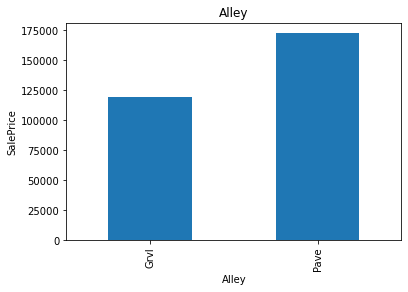

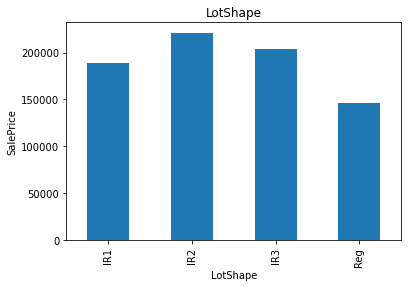

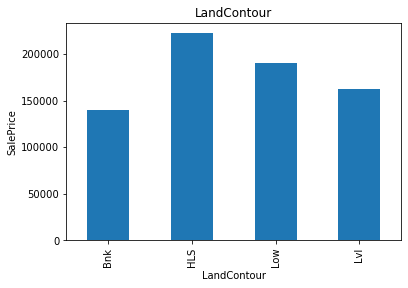

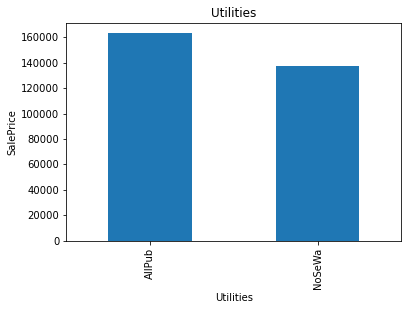

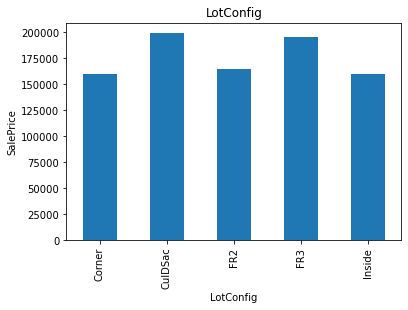

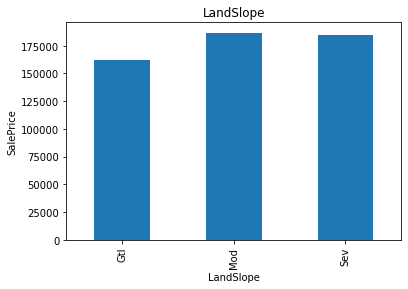

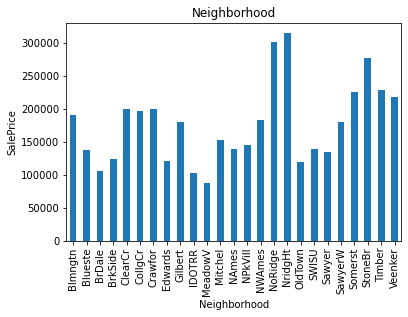

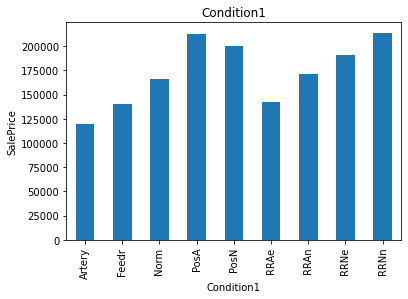

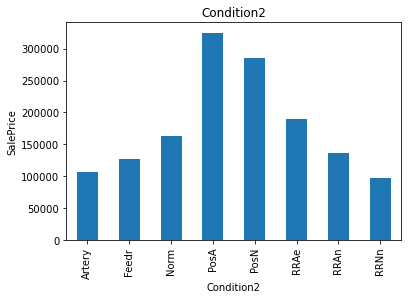

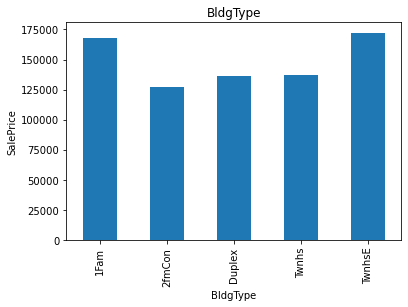

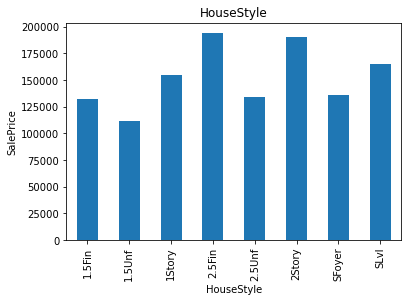

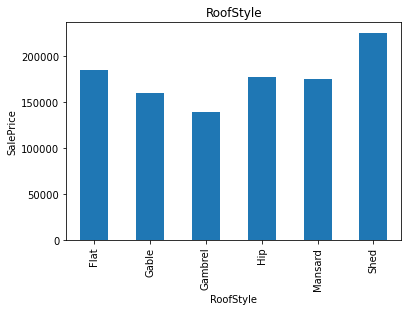

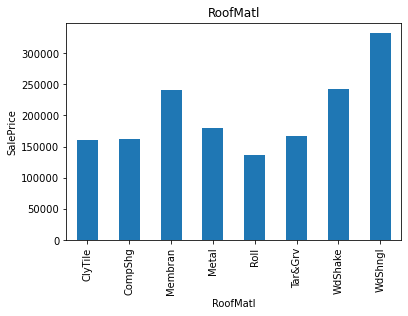

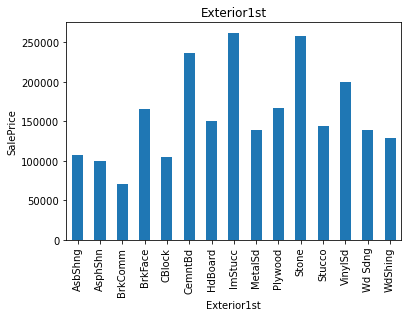

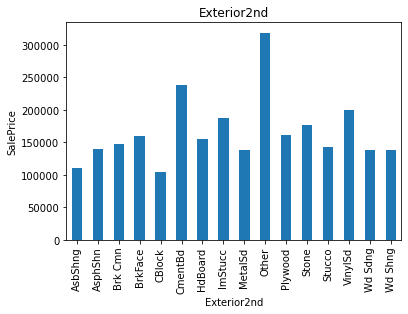

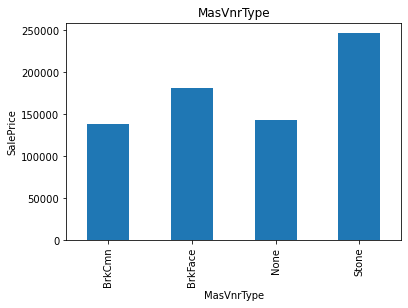

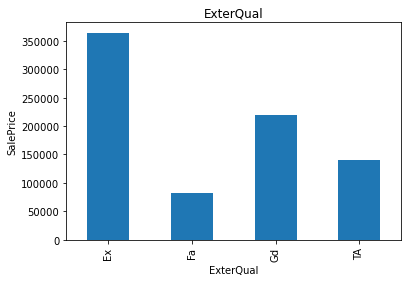

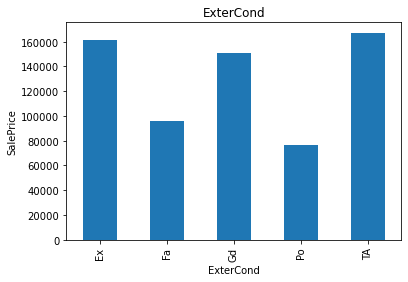

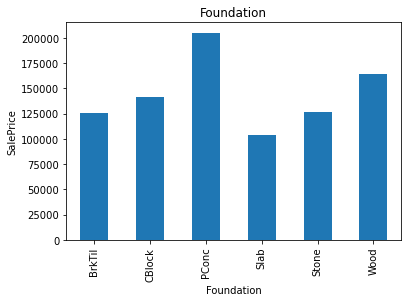

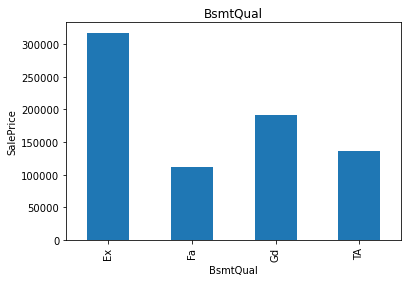

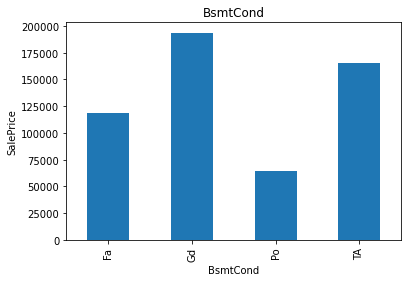

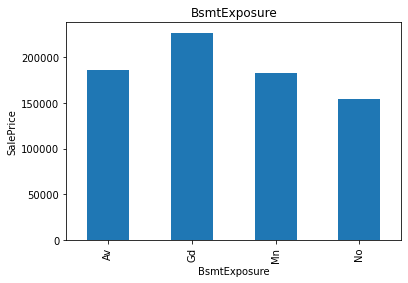

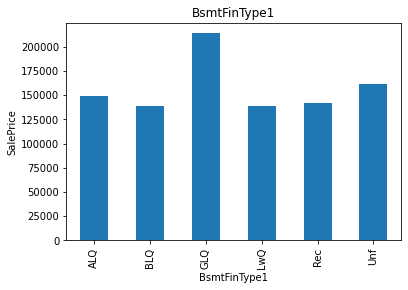

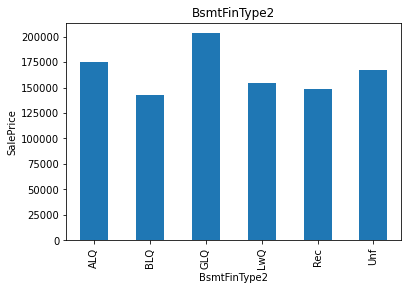

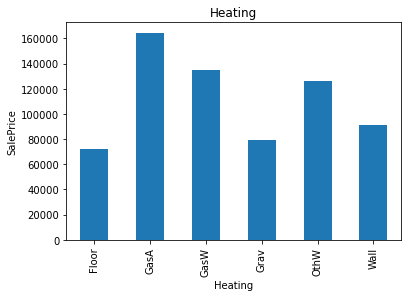

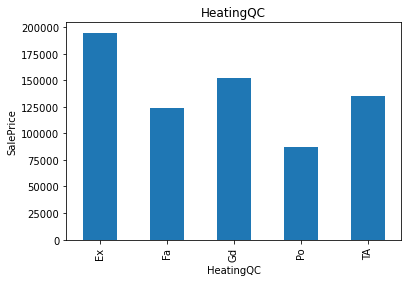

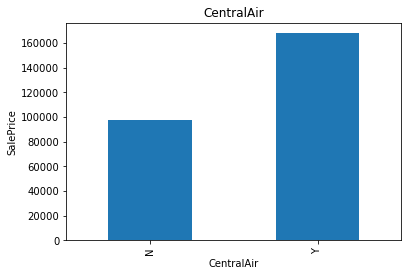

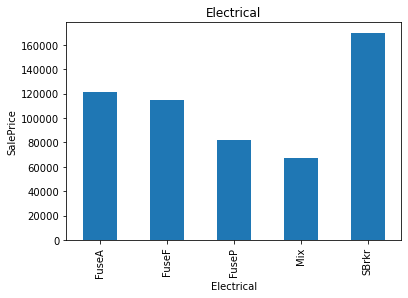

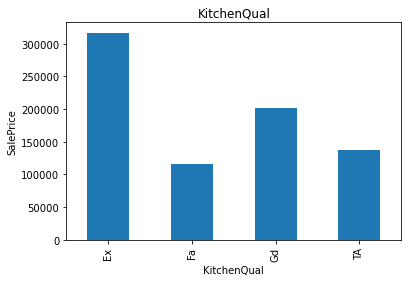

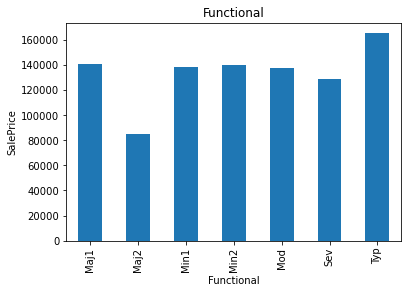

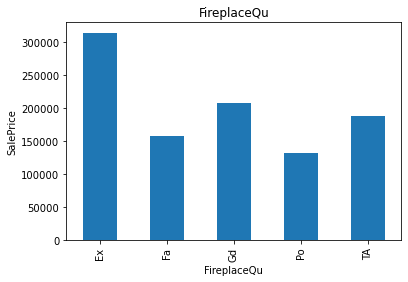

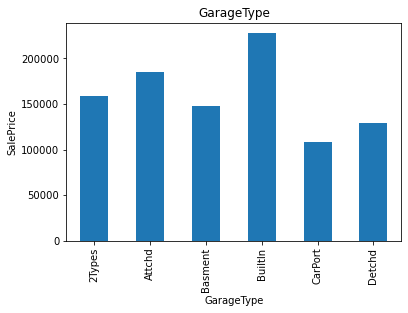

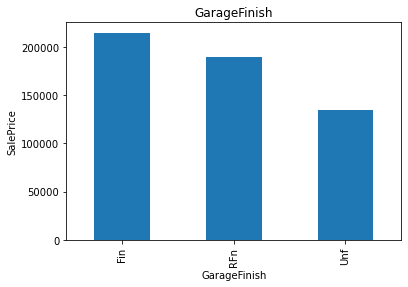

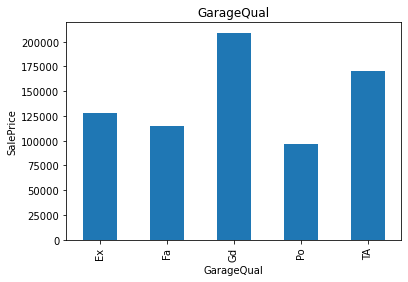

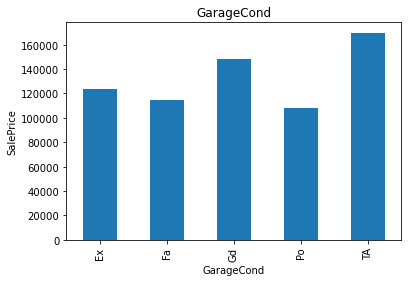

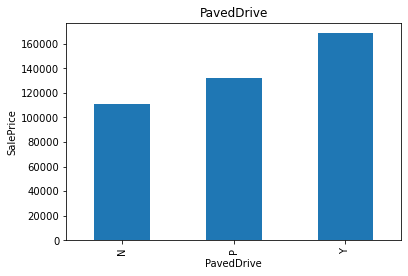

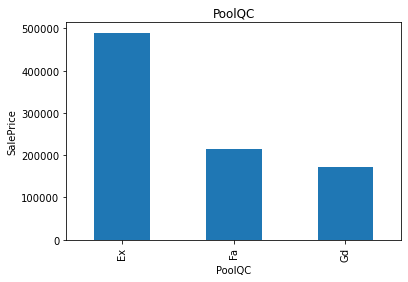

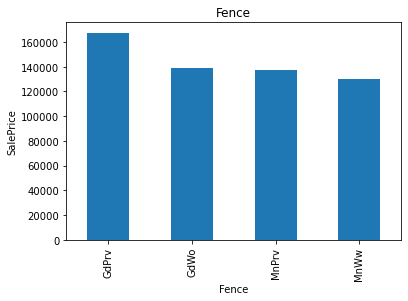

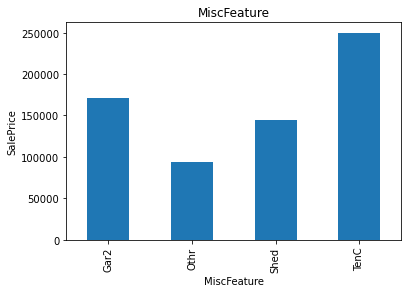

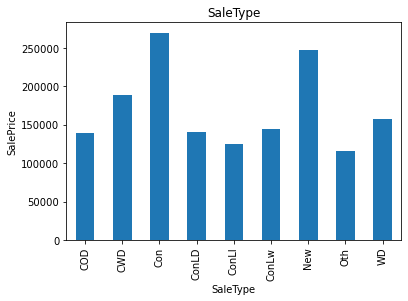

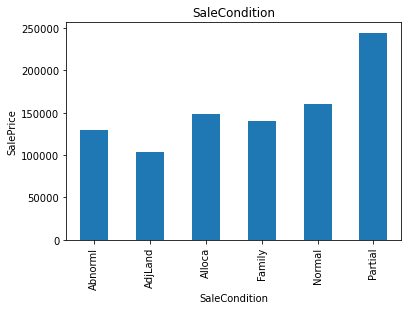

In [29]:
##Lets find out the relationship between categorical feature and dependent variable

for i in categoriacal_feature:
    data=dataset.copy()
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

# Feature Engineering

We will be performing all the below steps in Feature Engineering:

1. Missing Values.
2. Temporal Variables
3. Categorical Variable: Remove rare labels
4. Standarise the values of the variables of same range

### Missing values

In [30]:
##Let's Capture all the nan values
## First we will handle the categorical featurewhich are missing

feature_nan=[i for i in dataset.columns if dataset[i].isnull().sum()>0 and dataset[i].dtypes=='O']

for feature in feature_nan:
    print("{}: {}%missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))
             

Alley: 0.9377%missing values
MasVnrType: 0.0055%missing values
BsmtQual: 0.0253%missing values
BsmtCond: 0.0253%missing values
BsmtExposure: 0.026%missing values
BsmtFinType1: 0.0253%missing values
BsmtFinType2: 0.026%missing values
Electrical: 0.0007%missing values
FireplaceQu: 0.4726%missing values
GarageType: 0.0555%missing values
GarageFinish: 0.0555%missing values
GarageQual: 0.0555%missing values
GarageCond: 0.0555%missing values
PoolQC: 0.9952%missing values
Fence: 0.8075%missing values
MiscFeature: 0.963%missing values


In [31]:
##Impute missing nan with new values

def impute_cat_nan(dataset,feature_nan):
    data=dataset.copy()
    data[feature_nan]=data[feature_nan].fillna('Missing')
    return data


In [32]:
dataset=impute_cat_nan(dataset,feature_nan)
dataset[feature_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [33]:
dataset[feature_nan].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Missing,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing
1,Missing,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
2,Missing,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
3,Missing,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,Missing,Missing,Missing
4,Missing,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing


In [34]:
# Now Let's check for numerical variables containg missing values
numerical_nan=[i for i in dataset.columns if dataset[i].isnull().sum()>0 and dataset[i].dtypes!='object']

# We will print numerical nan variables and percentage of missing values
for i in numerical_nan:
    print('{}: {}%missing values'.format(i,np.round(dataset[i].isnull().mean(),4)))

LotFrontage: 0.1774%missing values
MasVnrArea: 0.0055%missing values
GarageYrBlt: 0.0555%missing values


In [35]:
#Replacing the numerical nan missing values

for i in numerical_nan:
    median_val=dataset[i].median()
    
    ##create a new feature to capture nan values for more info (best practice)
    dataset[i+'nan']=np.where(dataset[i],1,0)
    dataset[i].fillna(median_val,inplace=True)
    print('Median values ')
   
    print(i,':',median_val)

Median values 
LotFrontage : 69.0
Median values 
MasVnrArea : 0.0
Median values 
GarageYrBlt : 1980.0


In [36]:
dataset[numerical_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [37]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,1,1,1
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,1,0,1
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,1,1,1
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,1,0,1
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,1,1,1


### Temporal Variables

Since we have gathered relationship from the difference Year feature with Sales Price. 

In [38]:
##DateTime variable
##not considering YrSold because it is giving decreasing values

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [39]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


#### Handling skewed numerical values

We are considering numerical variables which does no have zero (just skip if zeros are present)

In [40]:
for i in continuos_features:
    print(dataset[i].value_counts())

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
13031     1
10991     1
8944      1
6897      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
0.0      869
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64
0       467
24       12
16        9
20        5
686       5
       ... 
535       1
534       1
532       1
522       1
2096      1
Name: BsmtFinSF1, Length: 637, dtype: int64
0       1293
180        5
374        3
117        2
391        2
        ... 
215        1
211        1
210        1
208        1
1474       1
Name: BsmtFinSF2, Length: 144, dtype: int64
0       118
728       9
384       8
572       7
600       7
       ... 
549       1
548 

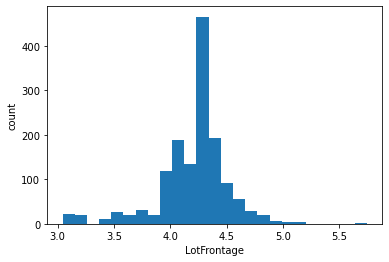

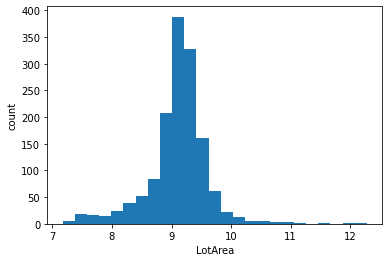

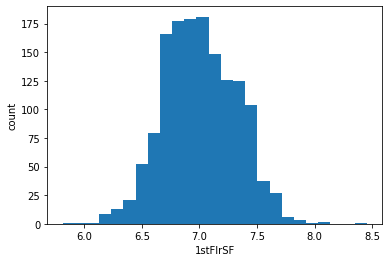

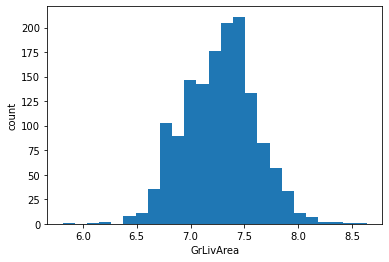

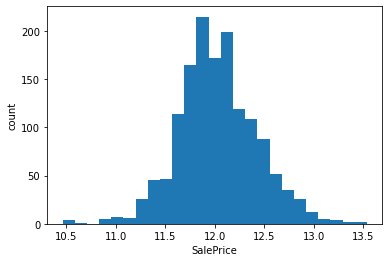

In [41]:
num_feature=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice'] ##Considering skewed data with no zero values

for i in num_feature:
    if 0 in dataset[i].unique():
        pass
    else:
        dataset[i]=np.log(dataset[i])
        dataset[i].plot.hist(bins=25)
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()

### Handling Rare Categorical feature

We will skip the categorical features which is having category less than 1% of observation

In [42]:
len(categoriacal_feature)

43

In [43]:
for i in categoriacal_feature:
    temp=dataset.groupby(i)['SalePrice'].count()/len(dataset)  ##calculating the count% of the category
    temp_d=temp[temp>0.01].index                            ## Condition for chosing category
    dataset[i]=np.where(dataset[i].isin(temp_d),dataset[i],'small_cat')   ## creating a new label to the category

In [44]:
dataset.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,1,1,1
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,small_cat,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,1,0,1
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,1,1,1
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,1,0,1
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,4.234107,9.186560,Pave,Missing,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310,Unf,0,370,680,GasA,Gd,Y,SBrkr,6.522093,790,0,7.293018,0,0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,16.0,Fin,2,420,TA,TA,Y,232,63,0,0,0,0,Missing,Missing,Shed,480,4,2009,WD,Normal,12.128111,1,1,1
96,97,20,RL,4.356709,9.236398,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,7,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Av,ALQ,1162,Unf,0,426,1588,GasA,Ex,Y,SBrkr,7.370231,0,0,7.370231,0,0,2,0,3,1,Gd,6,Typ,0,Missing,Attchd,7.0,RFn,2,472,TA,TA,Y,158,29,0,0,0,0,Missing,Missing,Missing,0,8,2006,WD,Normal,12.273731,1,1,1
97,98,20,RL,4.290459,9.298443,Pave,Missing,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,42,42,Hip,CompShg,HdBoard,HdBoard,BrkFace,48.0,TA,TA,CBlock,TA,TA,No,Rec,520,Unf,0,440,960,GasA,TA,Y,FuseF,6.866933,0,0,6.

In [46]:
for feature in categoriacal_feature:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [47]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

# Feature Scaling

In [52]:
##Selecting features to perform scaling
feature_scale=[i for i in dataset.columns if i not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
scaler1=StandardScaler()
scaler.fit(dataset[feature_scale])


MinMaxScaler()

In [53]:
scaler1.fit(dataset[feature_scale])

StandardScaler()

In [54]:
#Transform the data (minmax scaler) and add the other variables(categorical,alesPrice,Id)

data=pd.concat([data[['Id','SalePrice']].reset_index(drop=True),
                pd.DataFrame(scaler.transform(dataset[feature_scale]),columns=feature_scale)],axis=1)

##### Check the above code

In [55]:
data

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,208500,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.122500,0.666667,1.000000,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.0,1.00,1.0,1.000000,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.00,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.50,0.666667,0.75,0.0,1.0,0.0
1,2,181500,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.000000,0.333333,1.000000,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.0,1.00,1.0,1.000000,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.00,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,223500,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.101250,0.666667,1.000000,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.0,1.00,1.0,1.000000,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.00,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.727273,0.50,0.666667,0.75,0.0,1.0,0.0
3,4,140000,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.000000,0.333333,1.000000,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.0,0.75,1.0,1.000000,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.00,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,250000,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.218750,0.666667,1.000000,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.000000,0.209760,0.187398,1.0,1.00,1.0,1.000000,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.00,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,1.0,0.00000,1.000000,0.50,0.666667,0.75,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,0.235294,0.75

In [49]:
#data=pd.concat([data,dataset[categoriacal_feature]],axis=1)

In [56]:
data.to_csv("House_PredEDA.cv")

In [57]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,208500,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,1.0,0.0
1,2,181500,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,223500,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,1.0,0.0
3,4,140000,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,250000,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,1.0,0.0


# Feature Selection

1. Using Lasso
2. Selection from Model

In [58]:
## libraries for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [61]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,208500,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,1.0,0.0
1,2,181500,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,223500,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,1.0,0.0
3,4,140000,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,250000,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,1.0,0.0


In [62]:
##Caputuring the dependent feature
y_train=data[["SalePrice"]]

In [63]:
#dropping dependent feature from data
x_train=data.drop(["Id","SalePrice"],axis=1)

In [64]:
x_train.shape

(1460, 82)

In [65]:
##Applying Feature Selection
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(x_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4695570812.979492, tolerance: 920791133.4609975
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [66]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False])

In [67]:
selected_feat=x_train.columns[(feature_sel_model.get_support())]

In [71]:
print("Total features {}".format(x_train.shape))
print("selcted features: {}".format(len(selected_feat)))
#print("features with coefficients shrank to zero: {}".format(np.sum(sel_.estimator_.coef_==0)))

Total features (1460, 82)
selcted features: 80


In [72]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [73]:
x_train=x_train[selected_feat]

In [74]:
##The output data will be used for further clustering 
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MasVnrAreanan
0,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,1.0
1,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0
2,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,1.0
3,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0
4,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,1.0


# K-Means Custering

In [77]:
#Importing library
from sklearn.cluster import KMeans

KMeans(n_clusters=2, random_state=0)

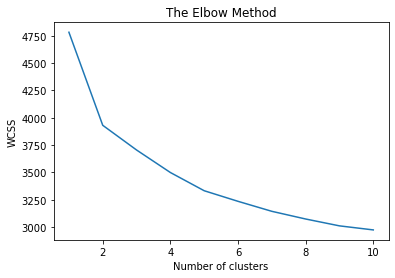

In [78]:
#Applying Elbow method to get the optimum number of clusters
"""This method is based on the relationship between the 
   within-cluster sum of squared distances(WCSS Or Inertia) 
   and the number of clusters."""

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
#By the above plot, we can see that there is a kink at k=2.
#Hence k=2 can be considered a good number of the cluster to cluster this data.

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_train)
print(y_kmeans) ##printing thr labels

[1 2 1 ... 3 2 2]


In [100]:
# check how many of the samples were correctly labeled
correct_labels = sum(y_kmeans)
correct_labels

3154

In [101]:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_kmeans.size))

Result: 3154 out of 1460 samples were correctly labeled.


In [108]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(kmeans, open(filename, 'wb'))

In [119]:
#printing data for cluster 0
x_train[y_kmeans==0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MasVnrAreanan
30,0.294118,0.00,0.321097,0.367499,1.0,0.5,0.0,0.333333,1.0,0.0,0.0,0.000000,0.2,1.0,0.75,1.0,0.333333,0.375,0.647059,0.967213,0.5,0.0,0.8,0.8,0.25,0.0,0.333333,0.0,0.25,0.50,0.75,0.25,0.833333,0.00000,0.833333,0.0,0.277825,0.106219,1.0,0.50,0.0,1.000000,0.251390,0.323487,0.0,0.485335,0.000000,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.000000,0.2,0.4,0.822430,0.333333,0.25,0.176305,0.666667,0.333333,0.0,0.000000,0.098720,0.311594,0.0,0.000000,0.0,0.0,0.5,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0
39,0.411765,0.75,0.418208,0.300629,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.227273,0.4,1.0,0.50,0.6,0.333333,0.500,0.389706,0.885246,0.0,0.0,0.0,0.7,0.25,0.0,0.333333,1.0,1.00,0.00,0.25,0.00,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,1.0,0.50,0.0,0.000000,0.468544,0.000000,0.0,0.437983,0.000000,0.0,0.666667,0.0,0.250,0.666667,0.000000,0.333333,1.0,0.000000,0.2,0.0,0.261682,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.454545,0.50,0.666667,0.25,0.0
48,1.000000,0.25,0.167298,0.241102,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.181818,0.4,1.0,0.00,1.0,0.333333,0.500,0.654412,0.032787,0.0,0.0,0.4,0.3,0.25,0.0,0.333333,1.0,0.25,0.50,0.75,0.25,0.833333,0.00000,0.833333,0.0,0.315068,0.120458,1.0,0.75,1.0,1.000000,0.298996,0.346731,0.0,0.519856,0.000000,0.0,0.666667,0.0,0.250,1.000000,0.333333,0.500000,1.0,0.000000,0.2,0.0,0.271028,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.184783,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.454545,0.75,1.000000,1.00,0.0
61,0.323529,0.25,0.388581,0.335012,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.000000,0.4,1.0,0.75,0.4,0.444444,0.750,0.639706,0.196721,0.0,0.0,0.4,0.3,0.25,0.0,0.333333,1.0,0.25,0.50,0.50,0.25,0.833333,0.00000,0.833333,0.0,0.226884,0.086743,1.0,0.50,0.0,1.000000,0.209504,0.256659,0.0,0.425164,0.000000,0.0,0.333333,0.0,0.375,0.333333,0.000000,0.333333,1.0,0.000000,0.2,0.4,0.672897,0.333333,0.25,0.203103,0.666667,1.000000,0.0,0.000000,0.000000,0.260870,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.181818,0.25,0.666667,0.75,0.0
78,0.411765,0.75,0.456066,0.413970,1.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.272727,0.4,1.0,0.50,0.6,0.333333,0.500,0.308824,0.704918,1.0,0.0,0.6,0.5,0.25,0.0,0.333333,1.0,0.50,0.50,0.75,0.25,0.833333,0.00000,0.833333,0.0,0.756849,0.289362,1.0,0.50,0.0,1.000000,0.630645,0.000000,0.0,0.589512,0.000000,0.0,0.666667,0.0,0.500,0.666667,0.333333,0.500000,1.0,0.000000,0.2,0.0,0.280374,0.000000,0.00,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.272727,1.00,0.666667,0.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.058824,0.75,0.388581,0.414369,1.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.181818,0.4,1.0,0.75,0.6,0.333333,0.625,0.588235,0.016393,0.0,0.0,0.2,0.1,0.25,0.0,0.333333,1.0,0.25,0.50,0.75,0.25,0.833333,0.00000,0.833333,0.0,0.280822,0.107365,1.0,0.50,1.0,1.000000,0.